In [1]:
## Perform the necessary imports

# display all lines of code in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# data manipulation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Metrics
# import the metrics class
from sklearn import metrics

In [2]:
# Load train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.columns.values # Get all columns
train_df.tail()

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis

<Axes: >

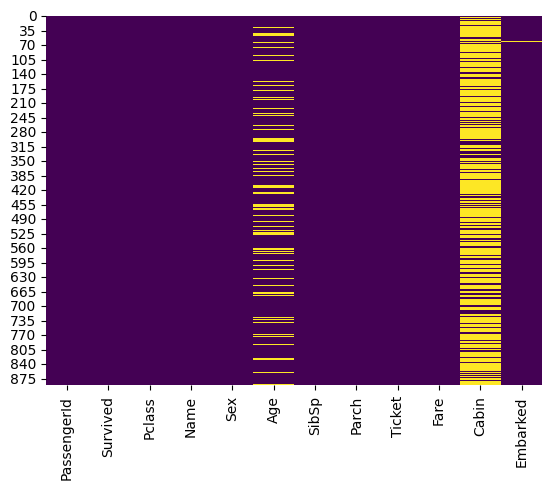

In [3]:
# Visualize missing data
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')

<Axes: >

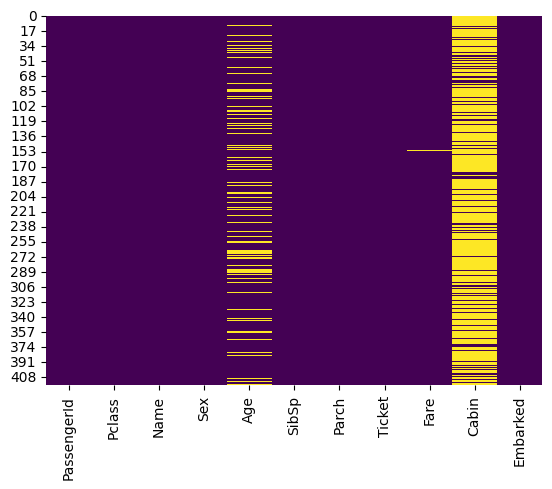

In [4]:
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')

In [5]:
# Do some basic EDA
train_df.info()
print('_'*40)
test_df.info()
train_df.nunique(axis=0, dropna=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


#### Notes

- Training data has 12 columns with 891 entries. Most of them are non-null except Cabin which has 785 null values and Age which has 277 null values. Embarked has 2 null values.
- Also cabin and age are incomplete in the test dataset. There is one incomplete Fare in test dataset as well
- **Categorical features:** Survived, Sex, and Embarked. 
- **Ordinal features:** Pclass. 
- **Continous:** Age, Fare. 
- **Discrete:** SibSp, Parch. 
- **Alphanumeric:** Ticket and Cabin

- Cabin has repeated elements meaning many people shared a cabin
- Ticket also has duplicates
- 3 places where people have embarked from

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


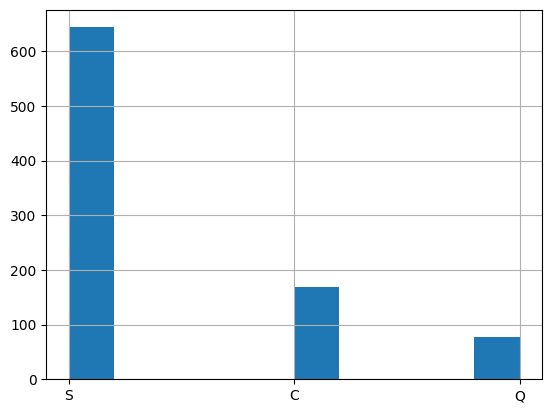

In [6]:
# Describe the dataset and see what is obtained. Works only for numerical vals
train_df.describe(percentiles=[0.61, 0.62])
train_df['Embarked'].hist()
train_df.describe(include=['O']) # Describe objects

Survived,0,1
Sex,,
female,81,233
male,468,109


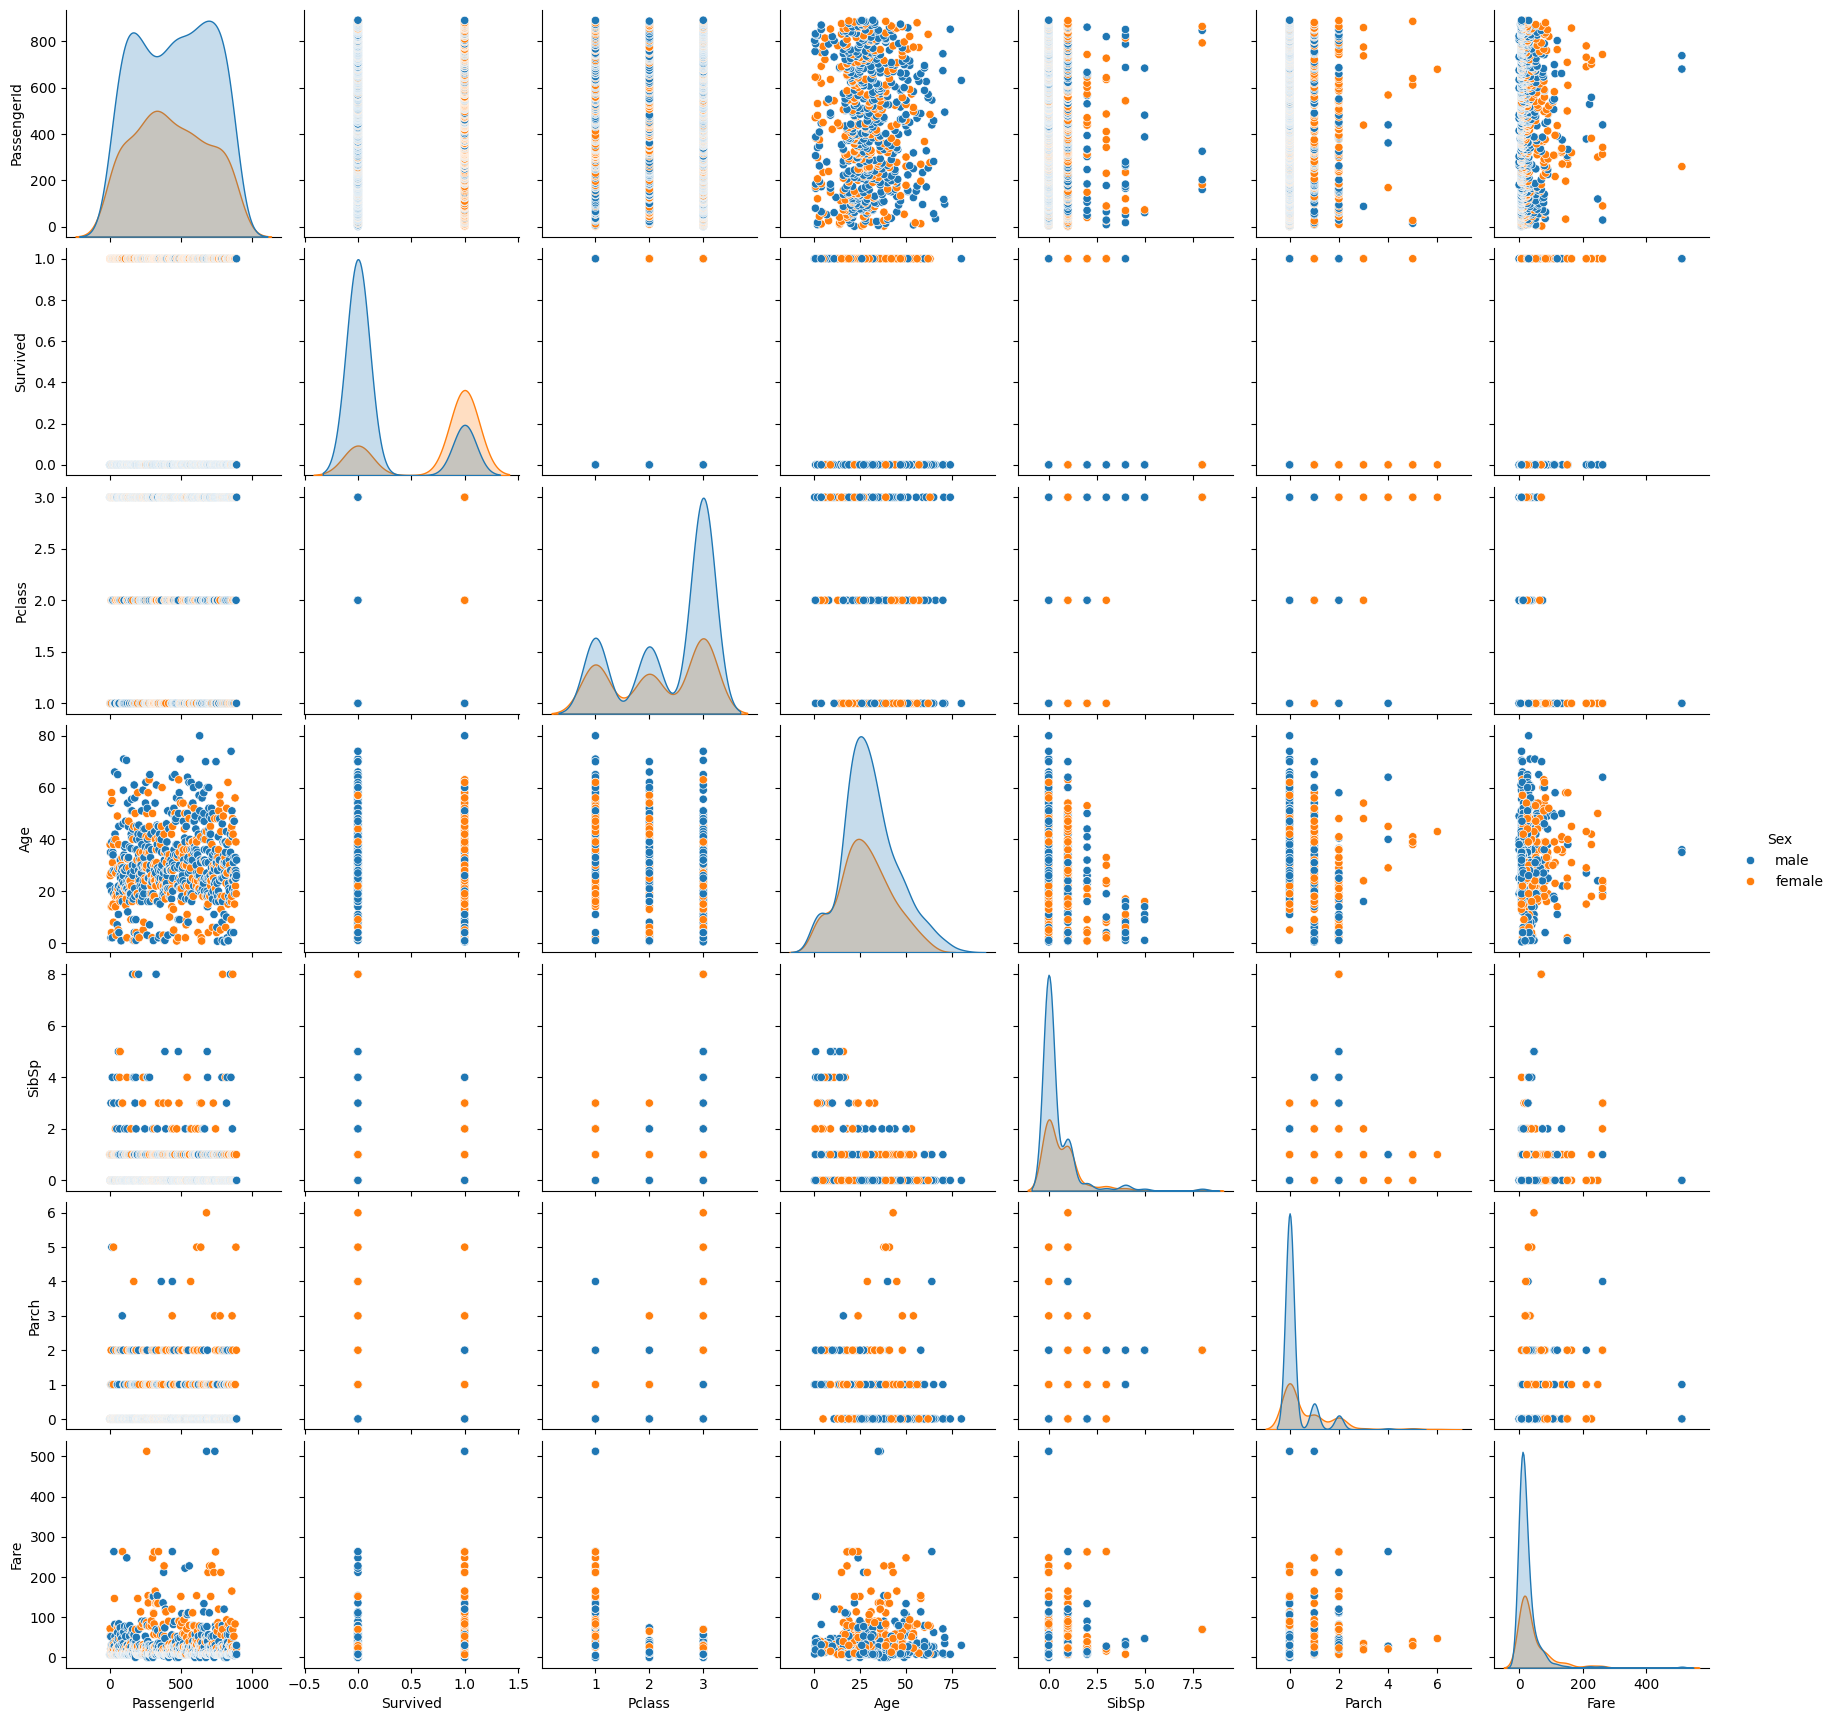

In [7]:
# Use the pairplot function to see the relationship between different cols
# Numerical vals only
sns.pairplot(train_df, hue='Sex')
pd.crosstab(train_df['Sex'], train_df['Survived'])

**Quick Observations:** 
- The column fare has a few outliers and will need to be taken care of.
- Males show a significantly lower survival chance.
- Nearly 70% without siblings spouse and nearly 75% without parents. These cxan be combined to see if they travel alone
- Visually no data are directly linearly correlated

In [8]:
# Pivot features first and understand what are chances of survival under various circumstances
train_df.groupby('Pclass')['Survived'].mean()
train_df.groupby('Sex')['Survived'].mean()
train_df.groupby('Embarked')['Survived'].mean()
train_df.groupby('SibSp')['Survived'].mean()
train_df.groupby('Parch')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

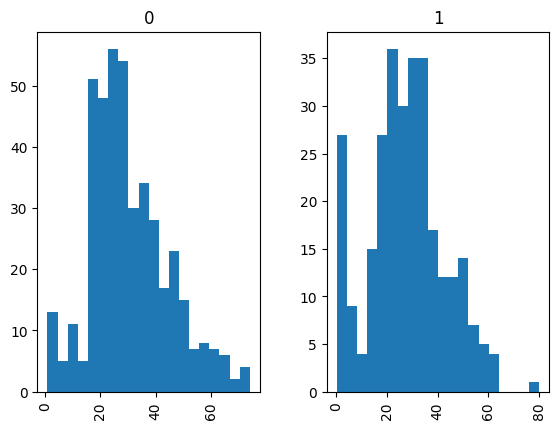

In [9]:
# Visualize
train_df['Age'].hist(bins=20, by=train_df['Survived']) # Age distribution of survivors

In [10]:
# Check mean age of survived and not survived group
train_df[['Age', 'Survived']].groupby('Survived').mean()

,Age
Survived,
0,30.626179
1,28.343690


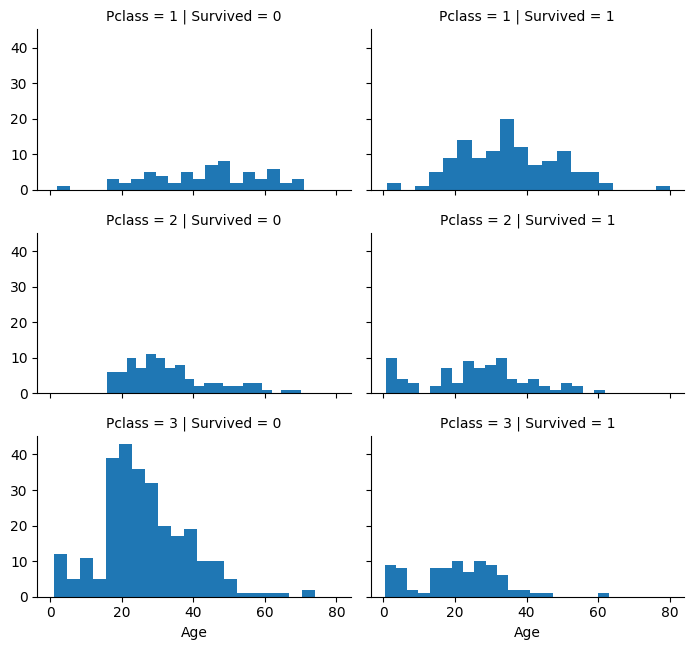

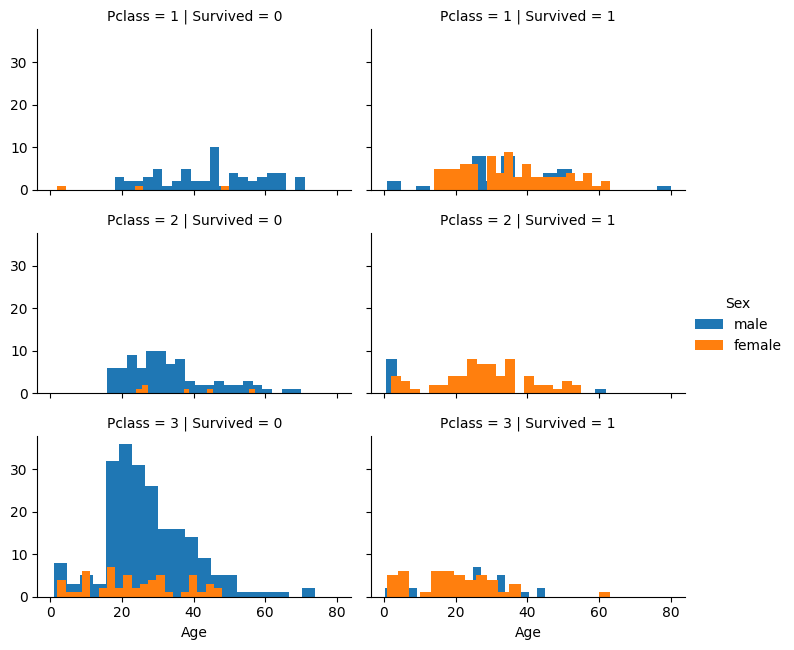

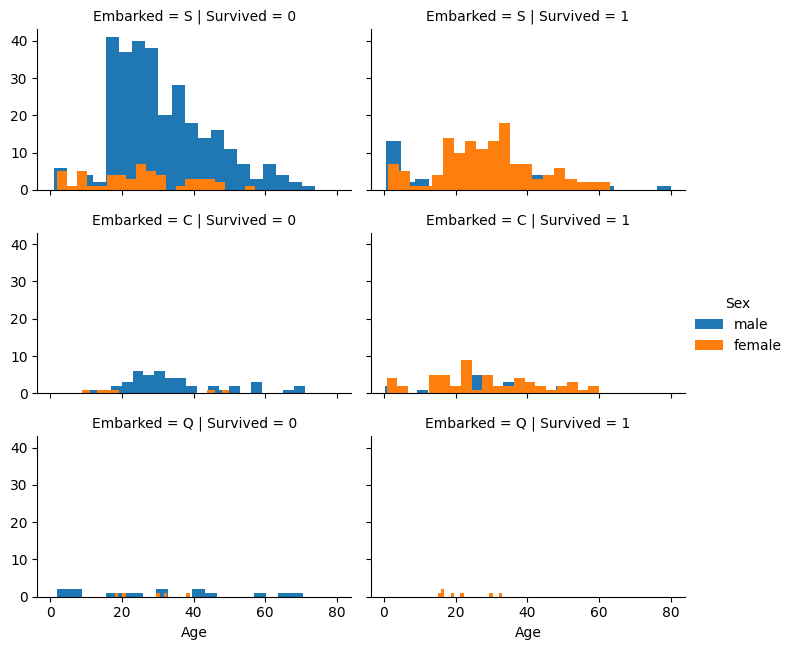

In [11]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
g.map(plt.hist, 'Age', bins=20)
g2 = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue='Sex', height=2.2, aspect=1.6)
g2.map(plt.hist, 'Age', bins=20)
g2.add_legend()
g3 = sns.FacetGrid(train_df, col='Survived', row='Embarked', hue='Sex', height=2.2, aspect=1.6)
g3.map(plt.hist, 'Age', bins=20)
g3.add_legend()


- Class 3 passengers have a lower chance of survival than class 1 and 2
- Almost no males in class 3 survived
- Most females and children in class 1 and 2 were saved
- Females in general had 74% chance of survival compared to 19% for men
- Until now we know for sure that Pclass, Fare, Sex have a direct relation to survival
- Maybe check for Embarked

<Axes: xlabel='Pclass', ylabel='Age'>

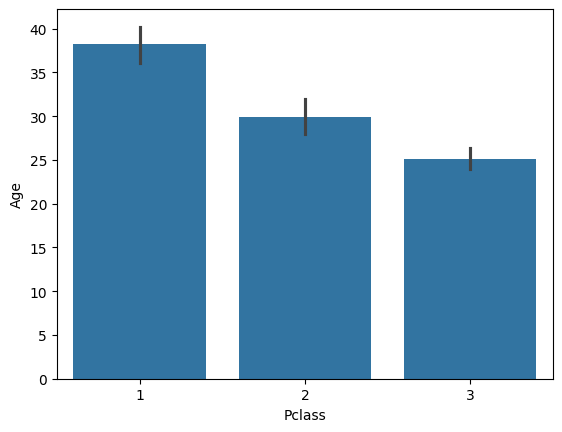

In [12]:
# Check the distribution of ages in different class
sns.barplot(train_df, x='Pclass', y='Age')
# Older people in class 1. So age and class could be related

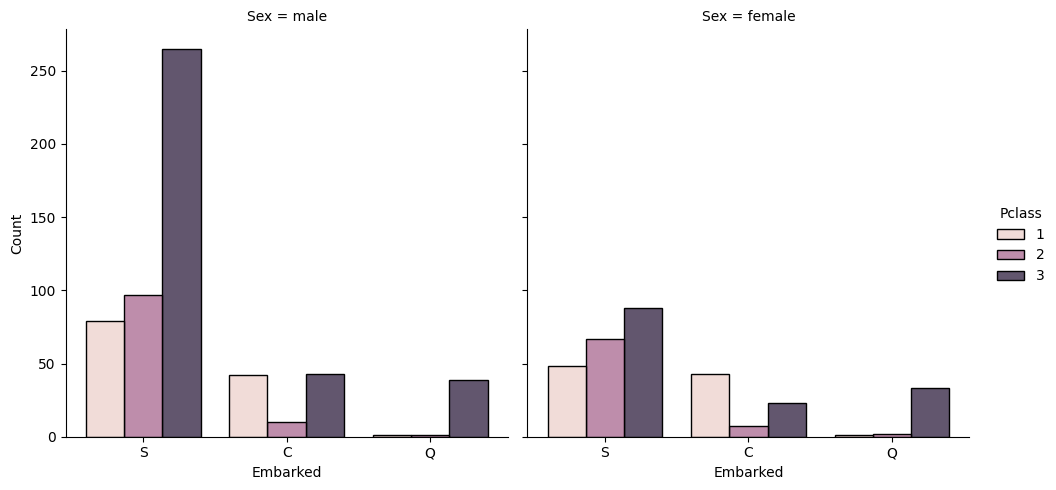

In [13]:
# Check if class and embarked are related because we know that class 1 passengers 
sns.displot(train_df, x='Embarked', col='Sex', hue='Pclass', multiple='dodge', shrink=0.8,)
# Naturally people embarking from C have higher chances of survival because they are mainly class 1
# Check correlation bw embarked and class and then add Embarked

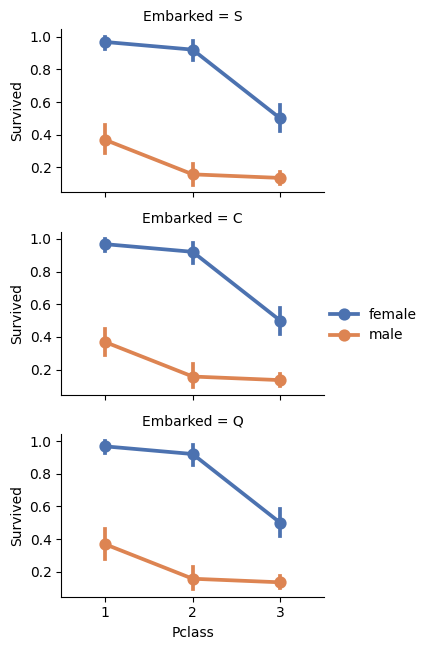

In [14]:
# For categorical features
embarked_grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
embarked_grid.map(sns.pointplot, data= train_df, x='Pclass', y='Survived', hue='Sex', order=None, palette='deep')
embarked_grid.add_legend()

<Axes: xlabel='Survived', ylabel='Fare'>

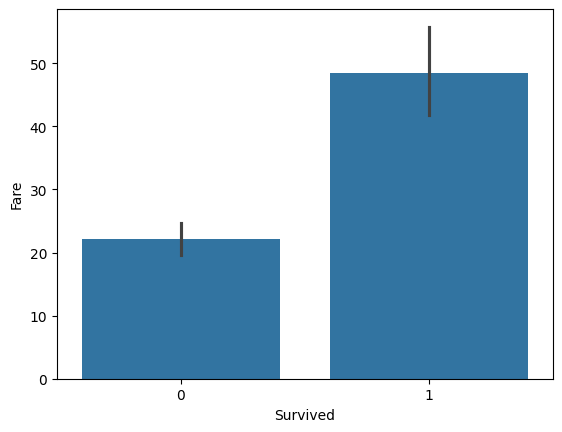

In [15]:
# Check if higher fare passengers have better survival chances
sns.barplot(train_df, x='Survived', y='Fare')

- So fare price and embarking both need to be added. However, their correlation with Pclass need to be evaluated
- Features added so far: Pclass, Sex, Age, Fare, Embarked (to complete)

# Wrangle Data
**Next Steps**
- Extract prefixes from names and then drop names
- Extract if people travel alone or with how many family members
- Check for age and fare if you want to keep exact values or ordinal bands
- Drop ticket and cabin features

In [16]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
# Drop Ticket and Cabin features
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

combine = [train_df, test_df]

# Create new feature: title of the person
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
# Replace uncommon titles with Rare 
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [19]:
# Convert all categorical features to numerical ones

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    # Title
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    # Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    # Embarked
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset.Embarked.mode()[0]) # fill NA with most common occurence
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1


In [20]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0,3
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,2,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0,3


In [21]:
# Now drop the name feature
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


In [22]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,1
1,893,3,1,47.0,1,0,7.0000,0,3
2,894,2,0,62.0,0,0,9.6875,2,1
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,3


In [23]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()
            guess_age =  int( age_guess/0.5 + 0.5 ) * 0.5

            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_age

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,0,1
1,1,1,1,38,1,0,71.2833,1,3
2,1,3,1,26,0,0,7.9250,0,2
3,1,1,1,35,1,0,53.1000,0,3
4,0,3,0,35,0,0,8.0500,0,1


In [24]:
test_df.info()
# One of the fares in the test data is missing. Fill it with the median
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 29.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   SibSp        418 non-n

C:\Users\Vivek Sundaram\AppData\Local\Temp\ipykernel_5992\1660024514.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


In [25]:
# Try to make family 1 column rather than sibsp and parch by writing IsAlone feature
# The idea is that ifd you are alone your survival chances are lower
train_df['IsAlone'] = 0
train_df.loc[train_df['SibSp'] + train_df['Parch'] == 0, 'IsAlone'] = 1
print(train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

test_df['IsAlone'] = 0
test_df.loc[test_df['SibSp'] + test_df['Parch'] == 0, 'IsAlone'] = 1

# Drop the Parch and Sibsp cols
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


<Axes: >

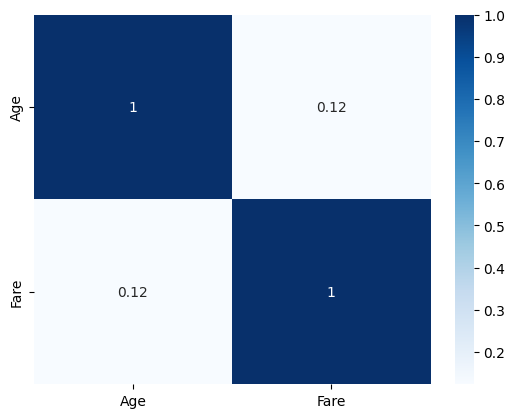

In [26]:
correlations = train_df[['Age', 'Fare']].corr()
sns.heatmap(correlations, cmap='Blues', annot=True)
# These are the only 2 continuous variables. Others are ordinals. We  can also bin these but we will lose slight information \
# may or may not be acceptable

In [27]:
# Bin age
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\Vivek Sundaram\AppData\Local\Temp\ipykernel_5992\1435697257.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [28]:
def change_age_to_ordinal(dataset):
    dataset.loc[ dataset.Age <= 16, 'Age'] = 0
    dataset.loc[(dataset.Age > 16) & (dataset.Age <= 32), 'Age'] = 1
    dataset.loc[(dataset.Age > 32) & (dataset.Age <= 48), 'Age'] = 2
    dataset.loc[(dataset.Age > 48) & (dataset.Age <= 64), 'Age'] = 3
    dataset.loc[ dataset.Age > 64, 'Age'] = 4

change_age_to_ordinal(train_df)
change_age_to_ordinal(test_df)

In [29]:
train_df = train_df.drop(['AgeBand'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [30]:
# Bin fares
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

C:\Users\Vivek Sundaram\AppData\Local\Temp\ipykernel_5992\3279552424.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [31]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,2,7.0000,0,3,0
2,894,2,0,3,9.6875,2,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


In [32]:

def change_fare_to_ordinal(dataset):
    dataset.loc[ dataset.Fare <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset.Fare > 7.91) & (dataset.Fare <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset.Fare > 14.454) & (dataset.Fare <= 31.0), 'Fare'] = 2
    dataset.loc[ dataset.Fare > 31.0, 'Fare'] = 3

change_fare_to_ordinal(train_df)
change_fare_to_ordinal(test_df)
train_df = train_df.drop(['FareBand'], axis=1)

In [33]:
# Create artificial feature age*class because we saw that age and class are closely related
# Higher age lower class
combine = [train_df, test_df]
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df[['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


# Model building and Training
- Logistic Regression
- KNN
- XGBOOST (done first so that true values for survival in test dataset can be obtained)

In [34]:
X_train = train_df.drop(["Survived", "Age*Class"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop(["PassengerId", "Age*Class"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

# XGBoost Claassifier

In [35]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, Y_train)
Y_train_pred_XGB = model_xgb.predict(X_train)
accuracy_xgb = round(metrics.accuracy_score(Y_train, Y_train_pred_XGB) * 100, 2)
print("Accuracy for XGB Classifier = " + str(accuracy_xgb))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy for XGB Classifier = 86.42


## Logistic Regression

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_train_pred = logreg.predict(X_train)

LogisticRegression()

Unfortunately actual Y_test is not provided in the dataset. Hence we can only compute goodness of fit, etc on predicting training data itself

Accuracy for logistic regression = 81.37


array([-1.26247005,  2.19357496, -0.56498463, -0.06544466,  0.28224956,
        0.40909161,  0.18556319])

,Feature,Coeff_LogReg
1,Age,2.193575
5,IsAlone,0.409092
4,Title,0.282250
3,Embarked,-0.065445
2,Fare,-0.564985
0,Sex,-1.262470


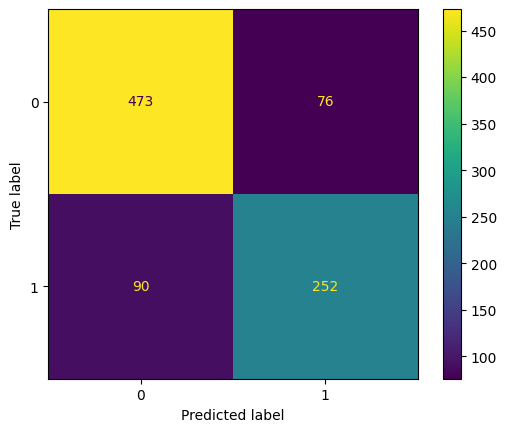

In [37]:
accuracy_lr = round(logreg.score(X_train, Y_train)* 100, 2)
print("Accuracy for logistic regression = " + str(accuracy_lr))

conf_matrix = metrics.confusion_matrix(Y_train, Y_train_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg.classes_).plot()

logreg.coef_[0] # Coefficients of the features
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Coeff_LogReg'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Coeff_LogReg', ascending=False)

In [38]:
# Calculating McFadden's R^2 using 1-LL/LL0 where LL0 is the log likelihood of the null model
Y_pred_prob = logreg.predict_proba(X_train)
ll_model = metrics.log_loss(Y_train, Y_pred_prob, normalize=True)
ll_null = metrics.log_loss(Y_train, np.ones(Y_train.shape[0])*Y_train.mean(), normalize=True)
r2_mcfadden = 1 - ll_model/ll_null
r2_mcfadden
ll_model
ll_null

0.3421849441147904

0.4380469220801393

0.6659119735267652

AUC for Logistic Regression = 0.86


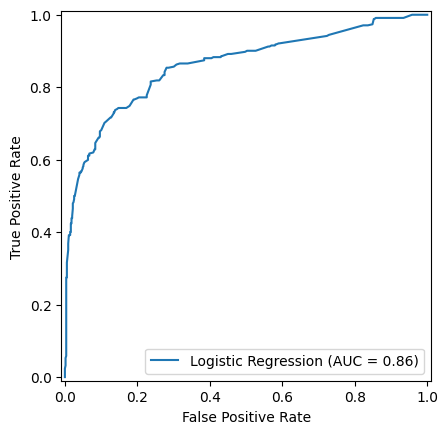

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute predicted probabilities

# Compute AUC
auc_logreg = roc_auc_score(Y_train, Y_pred_prob[:, 1])
print(f"AUC for Logistic Regression = {auc_logreg:.2f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_train, Y_pred_prob[:, 1])
roc_curve_disp = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_logreg, estimator_name='Logistic Regression')
roc_curve_disp.plot()

# Plot ROC curve
# plt.figure()
# plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
plt.show()

## KNN

In [40]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
accuracy_knn = round(knn.score(X_train, Y_train)* 100, 2)
print("Accuracy for KNN = " + str(accuracy_knn))


KNeighborsClassifier(n_neighbors=7)

Accuracy for KNN = 83.95


### Repair the test data and run the models again

In [41]:
Y_test = pd.DataFrame(model_xgb.predict(X_test), columns=['Survived'])
Y_test.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [42]:
# Generate predictions for the test data
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)

Accuracy for logistic regression = 88.04


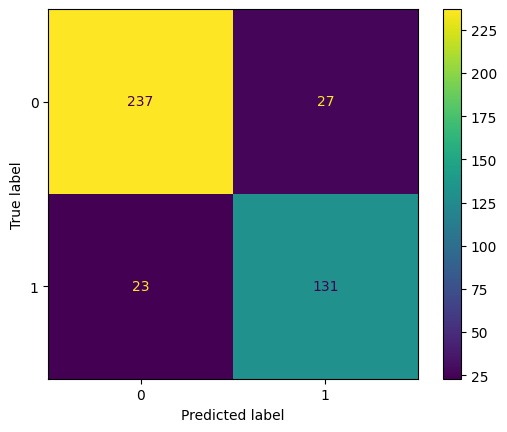

In [43]:
# Testing the accuracy of logistic regression on the test data
conf_matrix_logreg = metrics.confusion_matrix(Y_test, Y_pred_logreg)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logreg, display_labels=logreg.classes_).plot()
accuracy_logreg = round(logreg.score(X_test, Y_test)* 100, 2)
print("Accuracy for logistic regression = " + str(accuracy_logreg))

Accuracy for KNN = 90.91


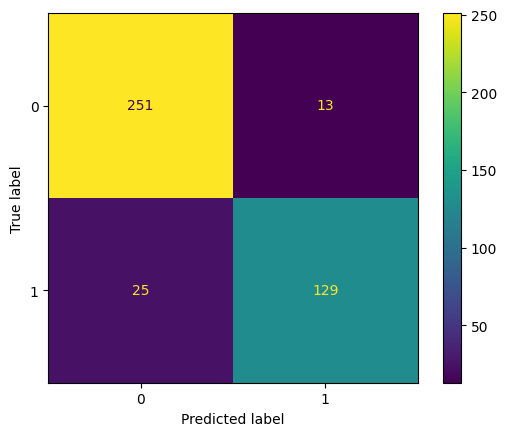

In [44]:
# Testing the accuracy of KNN on the test data
conf_matrix_knn = metrics.confusion_matrix(Y_test, Y_pred_knn)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=knn.classes_).plot()
accuracy_knn = round(knn.score(X_test, Y_test) * 100, 2)
print("Accuracy for KNN = " + str(accuracy_knn))

# Performing k-fold cross-validation 

In [45]:
# Combine the datasets to form a super dataset

# Concatenate X_train and X_test
superdata_X = pd.concat([X_train, X_test], axis=0)

# Concatenate Y_train and Y_test
superdata_Y = pd.concat([Y_train, Y_test], axis=0)

superdataset = pd.concat([superdata_X, superdata_Y], axis=1)
superdataset.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Survived
0,3,0,1,0.0,0,1,0,0
1,1,1,2,3.0,1,3,0,1
2,3,1,1,1.0,0,2,1,1
3,1,1,2,3.0,0,3,0,1
4,3,0,2,1.0,0,1,1,0


In [46]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation for Logistic Regression using roc-auc score
cv_scores_logreg = cross_val_score(logreg, X_train, Y_train, cv=50, scoring='roc_auc')
print(f"Logistic Regression CV Scores: {cv_scores_logreg}")
print(f"Mean CV Score for Logistic Regression: {cv_scores_logreg.mean()}")

# Perform k-fold cross-validation for KNN using roc-auc score
cv_scores_knn = cross_val_score(knn, X_train, Y_train, cv=50, scoring='roc_auc')
print(f"KNN CV Scores: {cv_scores_knn}")
print(f"Mean CV Score for KNN: {cv_scores_knn.mean()}")

Logistic Regression CV Scores: [0.94805195 0.66233766 0.87662338 0.97402597 0.74675325 0.94805195
 0.66233766 0.9025974  0.83116883 0.9025974  0.85714286 0.77272727
 0.97402597 0.74675325 0.56493506 0.81818182 1.         0.87662338
 0.87012987 0.92857143 0.93506494 0.88961039 0.71428571 0.79220779
 0.8961039  0.87012987 0.93506494 0.92207792 0.74025974 0.97402597
 0.7012987  0.77272727 0.8961039  0.96103896 0.93506494 0.71428571
 0.85064935 0.76623377 0.85714286 0.92857143 0.96103896 0.78787879
 0.89393939 0.96969697 0.84848485 0.74242424 0.75757576 0.92424242
 0.90909091 0.97142857]
Mean CV Score for Logistic Regression: 0.8536277056277055
KNN CV Scores: [0.80519481 0.62337662 0.80519481 0.85714286 0.85714286 0.95454545
 0.68181818 0.86363636 0.83116883 0.90909091 0.69480519 0.65584416
 0.94805195 0.61038961 0.69480519 0.78571429 0.94805195 0.87662338
 0.92857143 0.94805195 0.93506494 0.88311688 0.83766234 0.77272727
 0.92207792 0.94155844 0.99350649 0.92207792 0.74025974 1.
 0.688311

c:\Users\Vivek Sundaram\Desktop\Case Study Adyen\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


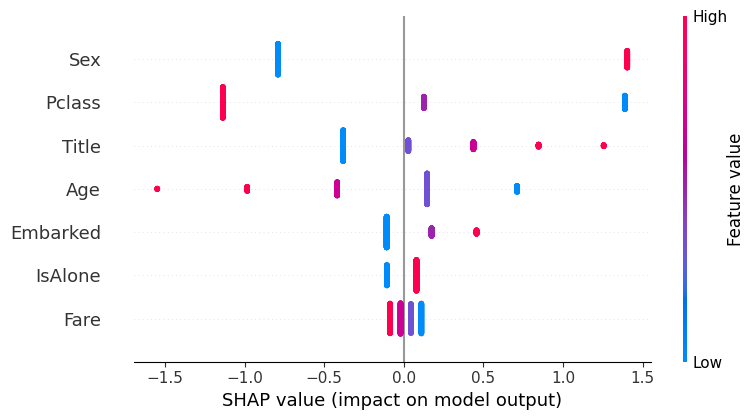

Using 891 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  3%|▎         | 30/891 [02:11<1:02:51,  4.38s/it]


KeyboardInterrupt: 

In [47]:
import shap
import scipy

# Create a SHAP explainer for the logistic regression model
explainer_logreg = shap.Explainer(logreg, X_train)
shap_values_logreg = explainer_logreg(X_train)

# Plot the SHAP values for the logistic regression model
shap.summary_plot(shap_values_logreg, X_train)

# Create a SHAP explainer for the KNN model
explainer_knn = shap.KernelExplainer(knn.predict, X_train)
shap_values_knn = explainer_knn.shap_values(X_train)

# Plot the SHAP values for the KNN model
shap.summary_plot(shap_values_knn, X_train)